In [1]:
ds_lc_quad = "/home/kardosp/continuethelist/datasets/LC-QuAD/"
ds_lc_quad_train = "/home/kardosp/continuethelist/datasets/LC-QuAD/lc_quad_dump_valid_train.json"
ds_lc_quad_test = "/home/kardosp/continuethelist/datasets/LC-QuAD/lc_quad_dump_valid_test.json"
ds_qald = "/home/kardosp/continuethelist/datasets/QALD/"
ds_qald_train = "/home/kardosp/continuethelist/datasets/QALD/qald9_dump_w_answers_train.json"
ds_qald_test = "/home/kardosp/continuethelist/datasets/QALD/qald9_dump_w_answers_test.json"


ds_lc_quad_train_w_graph = "/home/kardosp/continuethelist/datasets/LC-QuAD/lc_quad_dump_valid_w_graph_train.json"
ds_lc_quad_test_w_graph = "/home/kardosp/continuethelist/datasets/LC-QuAD/lc_quad_dump_valid_w_graph_test.json"

seed = 123

In [2]:
import os
import json

In [3]:
with open(ds_lc_quad_train_w_graph, "r") as f:
    lcquad_train = json.load(f)

with open(ds_lc_quad_test_w_graph, "r") as f:
    lcquad_test = json.load(f)

# Plot Graphs

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

In [49]:
def plot_graph(triples, output=None):
    nodes_set = set()
    for t in triples:
        nodes_set.add(t[0])
        nodes_set.add(t[2])

    G = nx.Graph()
    G.add_nodes_from(nodes_set)
    for t in triples:
        G.add_edge(t[0], t[2], label=t[1])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels = True, node_size=1000, node_color="#ff1500", edgecolors="#ffffff",
            node_shape = "s",  font_size=10)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'label'))

    if output is not None:
        plt.savefig(output, dpi=300, bbox_inches='tight')
        plt.clf()

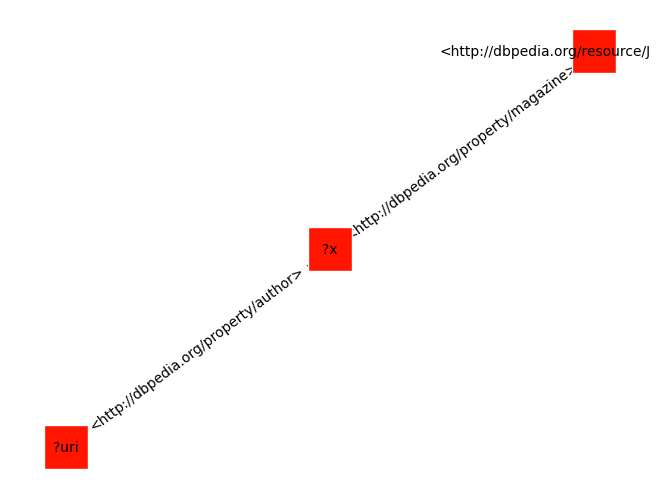

In [50]:
i = 5
plot_graph(lcquad_train[i]["graph"])

KeyboardInterrupt: 

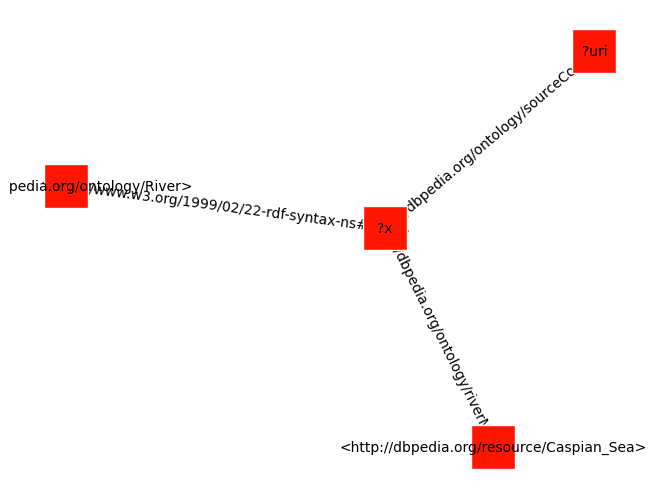

In [51]:
import os
if not os.path.exists(os.path.join(ds_lc_quad, "graph_imgs")):
    os.makedirs(os.path.join(ds_lc_quad, "graph_imgs"))

for task in lcquad_train:
    plot_graph(task["graph"], output=os.path.join(ds_lc_quad, "graph_imgs", "train_"+str(task["_id"])+"_img.jpg"))